In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests


# Import the API key.
from config import weather_api_key

In [2]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy


In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | iqaluit
Processing Record 2 of Set 1 | provideniya
Processing Record 3 of Set 1 | tuatapere
Processing Record 4 of Set 1 | ribeira grande
Processing Record 5 of Set 1 | half moon bay
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | sofiysk
City not found. Skipping...
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | arraial do cabo
Processing Record 12 of Set 1 | kodiak
Processing Record 13 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 14 of Set 1 | richards bay
Processing Record 15 of Set 1 | west wendover
Processing Record 16 of Set 1 | vestmannaeyjar
Processing Record 17 of Set 1 | barrow
Processing Record 18 of Set 1 | vao
Processing Record 19 of Set 1 | ayotzintepec
Processing Record 20 of Set 1 | sao felix do xingu
Processing Record 21 of Set 1

Processing Record 37 of Set 4 | upernavik
Processing Record 38 of Set 4 | bonthe
Processing Record 39 of Set 4 | plaster rock
Processing Record 40 of Set 4 | jumla
Processing Record 41 of Set 4 | ahipara
Processing Record 42 of Set 4 | gat
Processing Record 43 of Set 4 | songjianghe
Processing Record 44 of Set 4 | kandi
Processing Record 45 of Set 4 | atar
Processing Record 46 of Set 4 | puerto baquerizo moreno
Processing Record 47 of Set 4 | nelson bay
Processing Record 48 of Set 4 | qaanaaq
Processing Record 49 of Set 4 | alofi
Processing Record 50 of Set 4 | koulikoro
Processing Record 1 of Set 5 | karratha
Processing Record 2 of Set 5 | beloha
Processing Record 3 of Set 5 | ormara
Processing Record 4 of Set 5 | tuktoyaktuk
Processing Record 5 of Set 5 | aklavik
Processing Record 6 of Set 5 | ponta do sol
Processing Record 7 of Set 5 | dryden
Processing Record 8 of Set 5 | meulaboh
Processing Record 9 of Set 5 | mount gambier
Processing Record 10 of Set 5 | mizdah
Processing Record 

Processing Record 26 of Set 8 | heihe
Processing Record 27 of Set 8 | torbay
Processing Record 28 of Set 8 | baykalsk
Processing Record 29 of Set 8 | grand centre
City not found. Skipping...
Processing Record 30 of Set 8 | paamiut
Processing Record 31 of Set 8 | yalutorovsk
Processing Record 32 of Set 8 | kemijarvi
Processing Record 33 of Set 8 | batsfjord
Processing Record 34 of Set 8 | hualmay
Processing Record 35 of Set 8 | narrabri
Processing Record 36 of Set 8 | graaff-reinet
Processing Record 37 of Set 8 | rio casca
Processing Record 38 of Set 8 | baherden
Processing Record 39 of Set 8 | nador
Processing Record 40 of Set 8 | mahibadhoo
Processing Record 41 of Set 8 | awbari
Processing Record 42 of Set 8 | kiunga
Processing Record 43 of Set 8 | norman wells
Processing Record 44 of Set 8 | vostok
Processing Record 45 of Set 8 | labuhan
Processing Record 46 of Set 8 | kijang
Processing Record 47 of Set 8 | baruun-urt
Processing Record 48 of Set 8 | port hawkesbury
Processing Record 

Processing Record 15 of Set 12 | khorixas
Processing Record 16 of Set 12 | grand gaube
Processing Record 17 of Set 12 | chauk
Processing Record 18 of Set 12 | fortuna
Processing Record 19 of Set 12 | koster
Processing Record 20 of Set 12 | catarina
Processing Record 21 of Set 12 | yanan
City not found. Skipping...
Processing Record 22 of Set 12 | pilar
Processing Record 23 of Set 12 | ron phibun
Processing Record 24 of Set 12 | morgan city
Processing Record 25 of Set 12 | gumdag
Processing Record 26 of Set 12 | quatre cocos
Processing Record 27 of Set 12 | bachaquero
Processing Record 28 of Set 12 | marica
Processing Record 29 of Set 12 | maralal
Processing Record 30 of Set 12 | livanatai
Processing Record 31 of Set 12 | kilindoni
Processing Record 32 of Set 12 | miles city
Processing Record 33 of Set 12 | saint-andre-avellin
Processing Record 34 of Set 12 | kirovskiy
Processing Record 35 of Set 12 | rockland
Processing Record 36 of Set 12 | kodinsk
Processing Record 37 of Set 12 | dar

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Iqaluit,63.7506,-68.5145,0.70,64,8,15.99,CA,2021-11-16 02:00:14
1,Provideniya,64.3833,-173.3000,19.51,73,90,15.66,RU,2021-11-16 02:03:01
2,Tuatapere,-46.1333,167.6833,51.62,72,100,11.79,NZ,2021-11-16 02:03:01
3,Ribeira Grande,38.5167,-28.7000,68.04,83,10,14.92,PT,2021-11-16 02:03:01
4,Half Moon Bay,37.4636,-122.4286,62.62,90,20,1.01,US,2021-11-16 02:01:33
5,Ushuaia,-54.8000,-68.3000,36.81,84,100,4.68,AR,2021-11-16 02:03:02
6,Mataura,-46.1927,168.8643,56.91,56,99,11.30,NZ,2021-11-16 02:03:03
7,Rikitea,-23.1203,-134.9692,73.35,88,99,12.59,PF,2021-11-16 02:03:03
8,Punta Arenas,-53.1500,-70.9167,44.11,65,24,13.18,CL,2021-11-16 02:01:05
9,Arraial Do Cabo,-22.9661,-42.0278,71.35,73,90,22.10,BR,2021-11-16 02:03:04


In [11]:
# Reorder the columns

new_column_order = [ "City" , "Country" , "Date", "Lat" , "Lng" , "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df [new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Iqaluit,CA,2021-11-16 02:00:14,63.7506,-68.5145,0.70,64,8,15.99
1,Provideniya,RU,2021-11-16 02:03:01,64.3833,-173.3000,19.51,73,90,15.66
2,Tuatapere,NZ,2021-11-16 02:03:01,-46.1333,167.6833,51.62,72,100,11.79
3,Ribeira Grande,PT,2021-11-16 02:03:01,38.5167,-28.7000,68.04,83,10,14.92
4,Half Moon Bay,US,2021-11-16 02:01:33,37.4636,-122.4286,62.62,90,20,1.01
5,Ushuaia,AR,2021-11-16 02:03:02,-54.8000,-68.3000,36.81,84,100,4.68
6,Mataura,NZ,2021-11-16 02:03:03,-46.1927,168.8643,56.91,56,99,11.30
7,Rikitea,PF,2021-11-16 02:03:03,-23.1203,-134.9692,73.35,88,99,12.59
8,Punta Arenas,CL,2021-11-16 02:01:05,-53.1500,-70.9167,44.11,65,24,13.18
9,Arraial Do Cabo,BR,2021-11-16 02:03:04,-22.9661,-42.0278,71.35,73,90,22.10


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

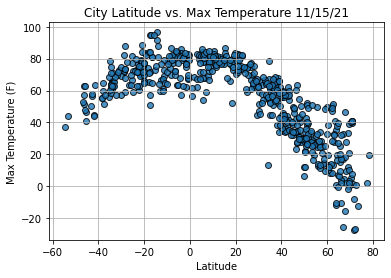

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

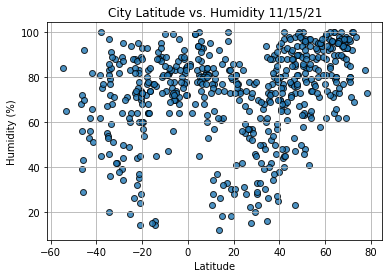

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

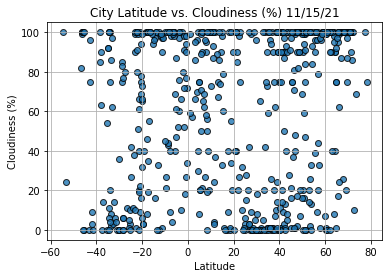

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

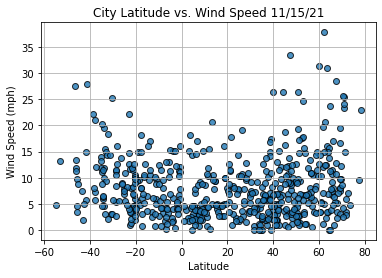

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [23]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

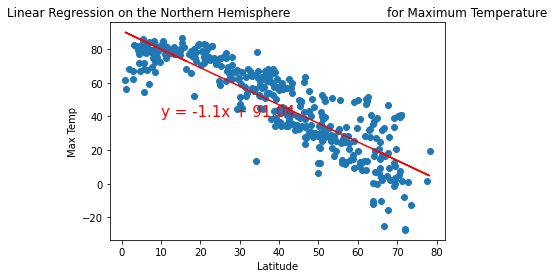

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))


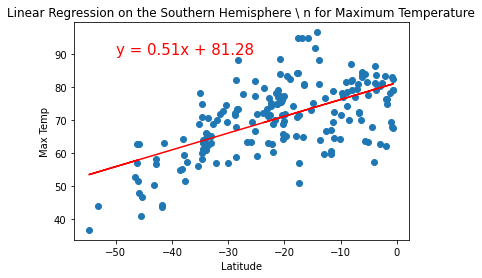

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \ n for Maximum Temperature', 'Max Temp',(-50,90))

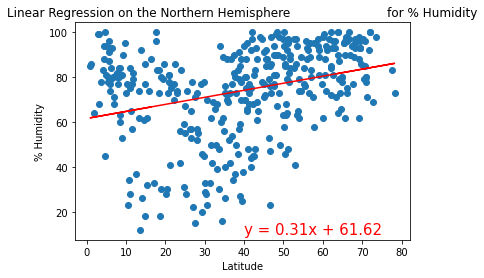

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

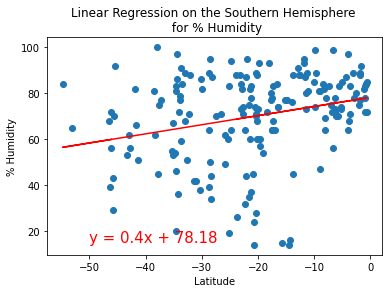

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

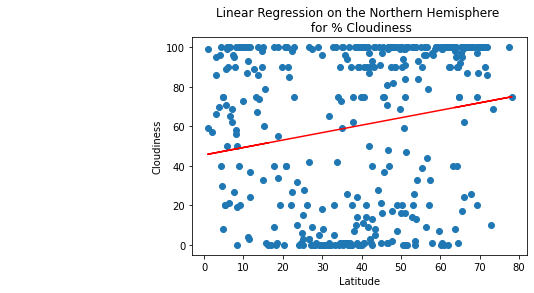

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', 'Cloudiness',(-50,60))

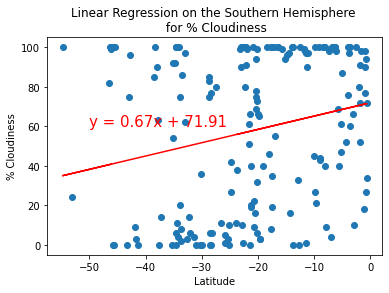

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))


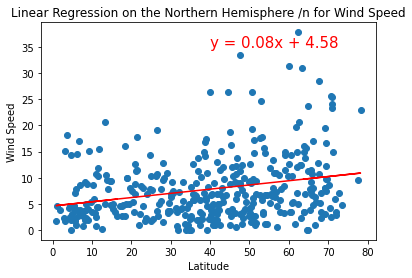

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                        'Linear Regression on the Northern Hemisphere /n for Wind Speed', 'Wind Speed',(40,35))

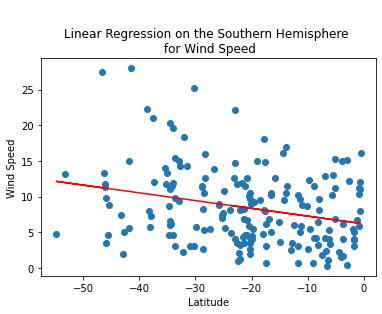

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))